# 网络生成

## 通用库引入

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

N = 30
direct_flag = True

## 设置随机种子

In [3]:
import numpy as np
rand_seed = 40

# for random results随机结果
# rand_seed = np.random.randint(0, high=2**32-1)

# Set the random seed for reproducibility
np.random.seed(rand_seed)

## 生成E-R网络

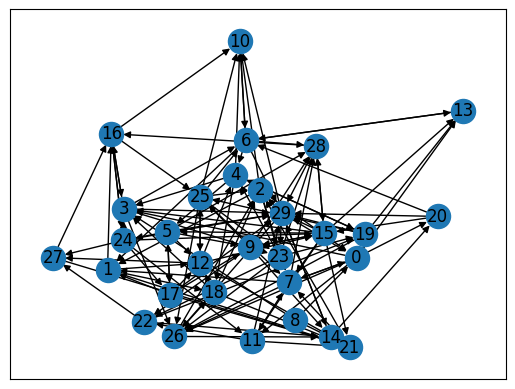

In [4]:
m = 2  # number of edges to attach from a new node to existing nodes
G = nx.erdos_renyi_graph(N, (2-(direct_flag != True)) *
                         m/N, directed=direct_flag, seed=rand_seed)
fig = plt.figure(1)
layout = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout)
plt.show('graph_ER.png')

In [5]:
# graph metrics
print(G.is_directed())

True


## 生成barabasi-albert网络

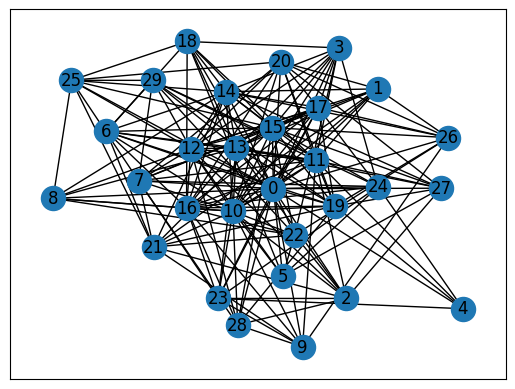

In [6]:
# 生成barabasi-albert网络
G = nx.barabasi_albert_graph(N, N-np.random.randint(0, N), seed=rand_seed)
fig = plt.figure(1)
layout = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout)
plt.show()

# domirank指标生成

## 计算sigma值

In [10]:
import drank as dr
GAdj = nx.to_scipy_sparse_array(G)
# 如果它是有向的（取决于链接的交互方式...）则翻转整个网络的方向
if direct_flag:
    GAdj = sp.sparse.csr_array(GAdj.T)
    
# 计算矩阵特征值
lambN = dr.find_eigenvalue(GAdj, max_iter=500, dt=0.01, check_step=25)
print(f'\nThe found smallest eigenvalue was: lambda_N = {lambN}')

if __name__ == '__main__':
    sigma, sigmaArray = dr.optimal_sigma(GAdj, endVal=lambN)
    print(f'\n The optimal sigma was found to be: {sigma}')

Current Interval : [-27.0, -1.0]
Current Interval : [-27.0, -1.3170731707317072]
Current Interval : [-27.0, -1.728]
Current Interval : [-27.0, -2.255874673629243]
Current Interval : [-27.0, -2.926333615580017]
Current Interval : [-5.280366692131398, -2.926333615580017]
Current Interval : [-5.280366692131398, -3.2933889219773675]
Current Interval : [-5.280366692131398, -3.6353834522205055]
Current Interval : [-4.306122846296116, -3.6353834522205055]
Current Interval : [-4.306122846296116, -3.7826850969041135]
Current Interval : [-4.306122846296116, -3.9012405016684433]
Current Interval : [-4.306122846296116, -3.9951513290523164]
Current Interval : [-4.306122846296116, -4.068606072956268]
Current Interval : [-4.306122846296116, -4.125494495322289]
Current Interval : [-4.306122846296116, -4.169215878564217]
Current Interval : [-4.306122846296116, -4.202619939068575]
Current Interval : [-4.306122846296116, -4.228026379954046]
Current Interval : [-4.306122846296116, -4.24728371780485]
Curre

## 递归算法

In [11]:
flag, ourDomiRankDistribution = dr.domirank_by_recursive(GAdj, sigma=sigma)

if flag:
    print(ourDomiRankDistribution)
else:
    print("Can not find recursive algorithm solve of Dominance rank distribution.")


[ 3.7420905  -1.3646159  -0.94877017 -0.7805466  -0.46394354 -0.41510203
 -0.9869024  -0.7833905  -0.54814535 -1.0635107   2.4762187   2.3179872
  1.5273373   1.4439507   0.57573915  1.5721278   0.9070664   0.10808641
  0.30243346 -0.17995577  0.4134275   2.1778638   0.18942367  0.7056982
  0.8607491   0.02876123  0.94950557  0.09073948  0.33199728  0.86888134]


## 解析算法

In [12]:
analyticalDomiRankDistribution = dr.domirank_by_annalytical(
    GAdj, sigma=sigma)
print(analyticalDomiRankDistribution)

[ 3.74230694 -1.36479526 -0.9488834  -0.78054587 -0.46395361 -0.41506107
 -0.98706875 -0.78359112 -0.54812952 -1.06375302  2.47632207  2.31815342
  1.52725662  1.44394463  0.57560882  1.57228263  0.90721075  0.10808325
  0.302365   -0.18022274  0.41343833  2.17814834  0.18917852  0.70574705
  0.8606278   0.02867725  0.94964797  0.09072563  0.33205743  0.86908738]


# 网络可视化过程
1. 节点攻击对比
2. 网络绘制

## 节点攻击对比

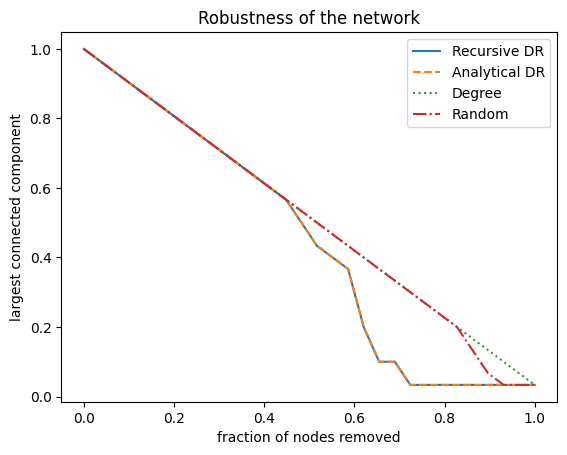

In [13]:
# generate the attack using the centrality (descending)
ourDomiRankAttack = dr.generate_attack(ourDomiRankDistribution)
analyticalDomiRankAttack = dr.generate_attack(analyticalDomiRankDistribution)
degreeAttack = dr.generate_attack(
    nx.degree_centrality(G))
import random
randomAttack = degreeAttack.copy()
random.shuffle(randomAttack)
# attack the network and get the largest connected component evolution
domiRankRobustness, domiRankLinks = dr.network_attack_sampled(
    GAdj, ourDomiRankAttack)
domiRankRobustnessAnalytical, domiRankLinksAnalytical = dr.network_attack_sampled(
    GAdj, analyticalDomiRankAttack)
degreeRobustness, degreeLinks = dr.network_attack_sampled(
    GAdj, degreeAttack)
randomRobustness, randomLinks = dr.network_attack_sampled(
    GAdj, randomAttack)

# generating the plot
fig2 = plt.figure(2)
ourRangeNew = np.linspace(0, 1, domiRankRobustness.shape[0])
plt.title('Robustness of the network')
plt.plot(ourRangeNew, domiRankRobustness, label='Recursive DR')
plt.plot(ourRangeNew, domiRankRobustnessAnalytical,
         label='Analytical DR', linestyle='--')
plt.plot(ourRangeNew, degreeRobustness, label='Degree', linestyle=':')
plt.plot(ourRangeNew, randomRobustness, label='Random', linestyle='-.')
plt.legend()
plt.xlabel('fraction of nodes removed')
plt.ylabel('largest connected component')
plt.show()

## 寻找sigma过程

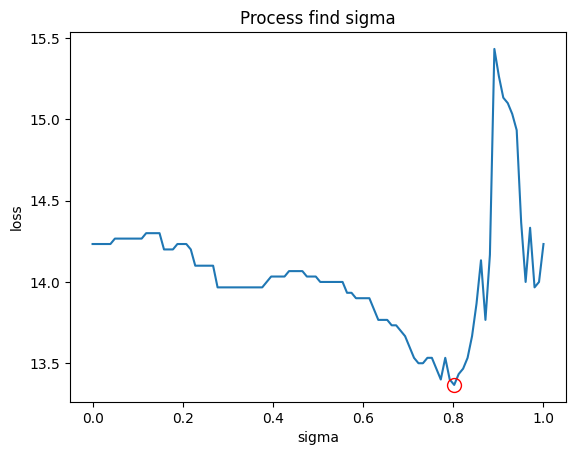

In [14]:
fig1 = plt.figure(1)
ourRange = np.linspace(0, 1, sigmaArray.shape[0])
index = np.where(sigmaArray == sigmaArray.min())[0][-1]

plt.plot(ourRange, sigmaArray)
plt.plot(ourRange[index], sigmaArray[index], 'ro', mfc='none', markersize=10)
plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Process find sigma')
plt.show()